In [1]:
folder1 = "/Users/zaarr/Desktop/POSTDOC HBKU/CODE/4. Video/vio_video" 
folder2 = "/Users/zaarr/Desktop/POSTDOC HBKU/CODE/4. Video/nonvio_video"

In [2]:
import os

def make_dataset(folder, extensions):
    videos = []
    for root, _, fnames in os.walk(folder):
        for fname in fnames:
            if any(fname.endswith(ext) for ext in extensions):
                path = os.path.join(root, fname)
                videos.append(path)
    return videos
#from torchvision.datasets.folder import make_dataset
#from torchvision.datasets.video_utils import VideoClips

In [3]:
dataset1 = make_dataset(folder1, extensions=("mp4",))
dataset2 = make_dataset(folder2, extensions=("mp4",))

In [4]:
dataset=dataset1+dataset2

In [5]:
print(dataset)

[]


In [6]:
from glob import glob

vio_files = glob("vio_video/*.mp4")
# Print the list of Python files
for file in vio_files:
    print(file)

vio_video/V_1.mp4
vio_video/V_11.mp4
vio_video/V_10.mp4
vio_video/V_2.mp4
vio_video/V_12.mp4
vio_video/V_13.mp4
vio_video/V_3.mp4
vio_video/V_7.mp4
vio_video/V_17.mp4
vio_video/V_16.mp4
vio_video/V_6.mp4
vio_video/V_4.mp4
vio_video/V_14.mp4
vio_video/V_15.mp4
vio_video/V_5.mp4
vio_video/V_8.mp4
vio_video/V_24.mp4
vio_video/V_18.mp4
vio_video/V_19.mp4
vio_video/V_25.mp4
vio_video/V_9.mp4
vio_video/V_22.mp4
vio_video/V_23.mp4
vio_video/V_21.mp4
vio_video/V_20.mp4


In [7]:
nonvio_files = glob("nonvio_video/*.mp4")
# Print the list of Python files
for file in nonvio_files:
    print(file)

nonvio_video/NV_13.mp4
nonvio_video/NV_7.mp4
nonvio_video/NV_6.mp4
nonvio_video/NV_12.mp4
nonvio_video/NV_4.mp4
nonvio_video/NV_5.mp4
nonvio_video/NV_11.mp4
nonvio_video/NV_15.mp4
nonvio_video/NV_1.mp4
nonvio_video/NV_14.mp4
nonvio_video/NV_16.mp4
nonvio_video/NV_3.mp4
nonvio_video/NV_17.mp4
nonvio_video/NV_26.mp4
nonvio_video/NV_27.mp4
nonvio_video/NV_25.mp4
nonvio_video/NV_19.mp4
nonvio_video/NV_18.mp4
nonvio_video/NV_24.mp4
nonvio_video/NV_20.mp4
nonvio_video/NV_8.mp4
nonvio_video/NV_9.mp4
nonvio_video/NV_21.mp4
nonvio_video/NV_23.mp4
nonvio_video/NV_22.mp4


In [8]:
label=[0]*len(nonvio_files)+[1]*len(vio_files)

In [9]:
import pandas as pd
df=pd.DataFrame(zip(nonvio_files+vio_files, label), columns = ['file', 'labels'])

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [10]:
print(df)

                      file  labels
0   nonvio_video/NV_13.mp4       0
1    nonvio_video/NV_7.mp4       0
2    nonvio_video/NV_6.mp4       0
3   nonvio_video/NV_12.mp4       0
4    nonvio_video/NV_4.mp4       0
5    nonvio_video/NV_5.mp4       0
6   nonvio_video/NV_11.mp4       0
7   nonvio_video/NV_15.mp4       0
8    nonvio_video/NV_1.mp4       0
9   nonvio_video/NV_14.mp4       0
10  nonvio_video/NV_16.mp4       0
11   nonvio_video/NV_3.mp4       0
12  nonvio_video/NV_17.mp4       0
13  nonvio_video/NV_26.mp4       0
14  nonvio_video/NV_27.mp4       0
15  nonvio_video/NV_25.mp4       0
16  nonvio_video/NV_19.mp4       0
17  nonvio_video/NV_18.mp4       0
18  nonvio_video/NV_24.mp4       0
19  nonvio_video/NV_20.mp4       0
20   nonvio_video/NV_8.mp4       0
21   nonvio_video/NV_9.mp4       0
22  nonvio_video/NV_21.mp4       0
23  nonvio_video/NV_23.mp4       0
24  nonvio_video/NV_22.mp4       0
25       vio_video/V_1.mp4       1
26      vio_video/V_11.mp4       1
27      vio_video/V_

In [ ]:
import shutil
import zipfile

# Set the paths of the 'NonViolence' and 'Violence' directories
non_path = 'vio_video'
vio_path = 'nonvio_video'

# Set the output zip file path
output_zip_path = 'output.zip'

# Get the file lists for 'NonViolence' and 'Violence' directories
non_files = glob(non_path + '/*')
vio_files = glob(vio_path + '/*')

# Assign labels to the files
labels = [0] * len(non_files) + [1] * len(vio_files)

# Create a new zip file
with zipfile.ZipFile(output_zip_path, 'w') as zip_file:
    # Add files from 'NonViolence' directory to the zip with labels
    for file, label in zip(non_files, labels[:len(non_files)]):
        zip_file.write(file, arcname=f'NonViolence/{label}/{os.path.basename(file)}')

    # Add files from 'Violence' directory to the zip with labels
    for file, label in zip(vio_files, labels[len(non_files):]):
        zip_file.write(file, arcname=f'Violence/{label}/{os.path.basename(file)}')

In [12]:
# Specify the path of the zip file
zip_path = 'output.zip'

# Specify the destination directory for extraction
extract_path = 'extracted_files'

# Extract the contents of the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)

In [2]:
import os
import cv2
import math
import pafy
import random
import numpy as np
import datetime as dt
import tensorflow as tf
from moviepy.editor import *
from collections import deque
import matplotlib.pyplot as plt
%matplotlib inline
 
from sklearn.model_selection import train_test_split
 
from tensorflow.keras.layers import *
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import plot_model

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


2023-06-07 13:44:01.685955: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
seed_constant = 23
np.random.seed(seed_constant)
random.seed(seed_constant)
tf.random.set_seed(seed_constant)

In [4]:
#!wget -nc --no-check-certificate https://www.crcv.ucf.edu/data/UCF50.rar
#!unrar x UCF50.rar -inul -y

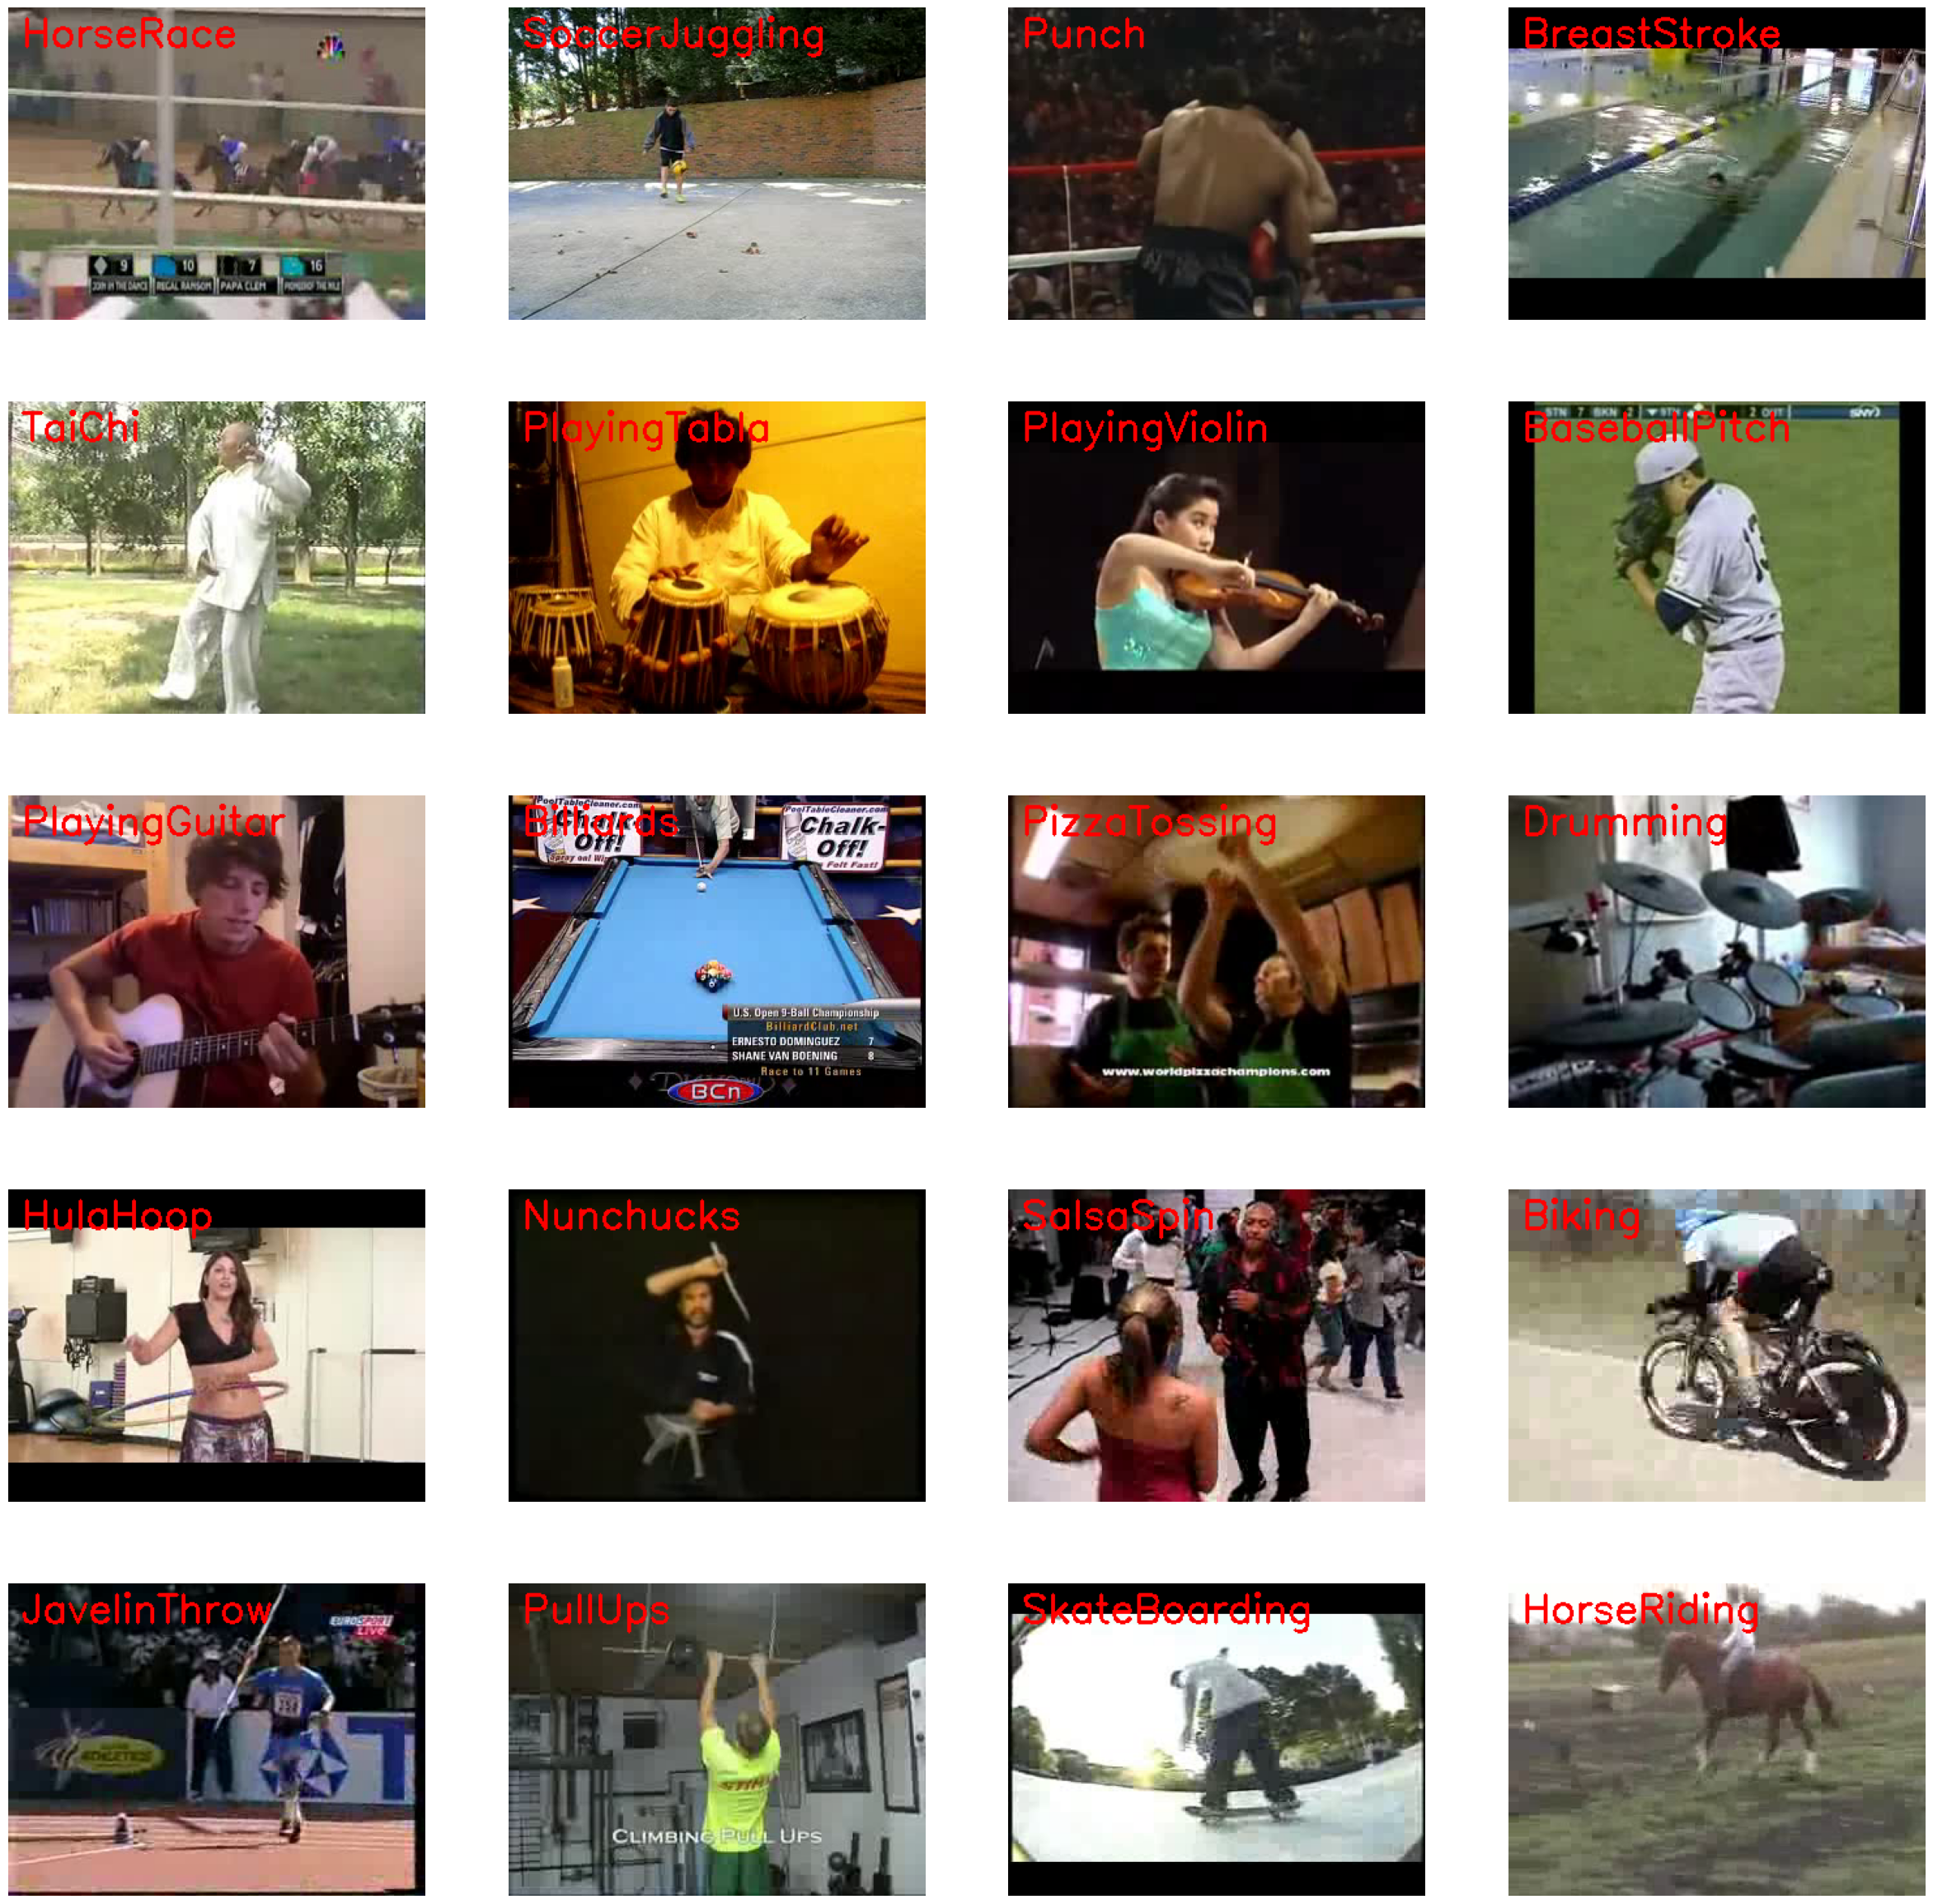

In [6]:
# Create a Matplotlib figure
plt.figure(figsize = (30, 30))
 
# Get Names of all classes in UCF50
all_classes_names = os.listdir('UCF50')
 
# Generate a random sample of images each time the cell runs
random_range = random.sample(range(len(all_classes_names)), 20)
 
# Iterating through all the random samples
for counter, random_index in enumerate(random_range, 1):
 
    # Getting Class Name using Random Index
    selected_class_Name = all_classes_names[random_index]
 
    # Getting a list of all the video files present in a Class Directory
    video_files_names_list = os.listdir(f'UCF50/{selected_class_Name}')
 
    # Randomly selecting a video file
    selected_video_file_name = random.choice(video_files_names_list)
 
    # Reading the Video File Using the Video Capture
    video_reader = cv2.VideoCapture(f'UCF50/{selected_class_Name}/{selected_video_file_name}')
     
    # Reading The First Frame of the Video File
    _, bgr_frame = video_reader.read()
 
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # Converting the BGR Frame to RGB Frame 
    rgb_frame = cv2.cvtColor(bgr_frame, cv2.COLOR_BGR2RGB)
 
    # Adding The Class Name Text on top of the Video Frame.
    cv2.putText(rgb_frame, selected_class_Name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 0, 0), 2)
     
    # Assigning the Frame to a specific position of a subplot
    plt.subplot(5, 4, counter)
    plt.imshow(rgb_frame)
    plt.axis('off')

In [7]:
image_height, image_width = 64, 64
max_images_per_class = 8000
 
dataset_directory = "UCF50"
classes_list = ["WalkingWithDog", "TaiChi", "Swing", "HorseRace"]
 
model_output_size = len(classes_list)

In [8]:
def frames_extraction(video_path):
    # Empty List declared to store video frames
    frames_list = []
     
    # Reading the Video File Using the VideoCapture
    video_reader = cv2.VideoCapture(video_path)
 
    # Iterating through Video Frames
    while True:
 
        # Reading a frame from the video file 
        success, frame = video_reader.read() 
 
        # If Video frame was not successfully read then break the loop
        if not success:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
         
        # Appending the normalized frame into the frames list
        frames_list.append(normalized_frame)
     
    # Closing the VideoCapture object and releasing all resources. 
    video_reader.release()
 
    # returning the frames list 
    return frames_list

In [9]:
def create_dataset():
 
    # Declaring Empty Lists to store the features and labels values.
    temp_features = [] 
    features = []
    labels = []
     
    # Iterating through all the classes mentioned in the classes list
    for class_index, class_name in enumerate(classes_list):
        print(f'Extracting Data of Class: {class_name}')
         
        # Getting the list of video files present in the specific class name directory
        files_list = os.listdir(os.path.join(dataset_directory, class_name))
 
        # Iterating through all the files present in the files list
        for file_name in files_list:
 
            # Construct the complete video path
            video_file_path = os.path.join(dataset_directory, class_name, file_name)
 
            # Calling the frame_extraction method for every video file path
            frames = frames_extraction(video_file_path)
 
            # Appending the frames to a temporary list.
            temp_features.extend(frames)
         
        # Adding randomly selected frames to the features list
        features.extend(random.sample(temp_features, max_images_per_class))
 
        # Adding Fixed number of labels to the labels list
        labels.extend([class_index] * max_images_per_class)
         
        # Emptying the temp_features list so it can be reused to store all frames of the next class.
        temp_features.clear()
 
    # Converting the features and labels lists to numpy arrays
    features = np.asarray(features)
    labels = np.array(labels)  
 
    return features, labels

In [10]:
features, labels = create_dataset()

Extracting Data of Class: WalkingWithDog
Extracting Data of Class: TaiChi
Extracting Data of Class: Swing
Extracting Data of Class: HorseRace


In [11]:
one_hot_encoded_labels = to_categorical(labels)

In [12]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
features_train, features_test, labels_train, labels_test = train_test_split(features, labels, test_size=0.2, random_state=42)

# 'features' is your input data (features)
# 'labels' is your corresponding output data (labels)
# test_size=0.2 specifies that 20% of the data will be used for testing
# random_state=42 sets a seed value for reproducibility

# Verify the shapes of the data splits
print("Training set shapes:")
print("Features:", features_train.shape)
print("Labels:", labels_train.shape)
print("Testing set shapes:")
print("Features:", features_test.shape)
print("Labels:", labels_test.shape)

Training set shapes:
Features: (25600, 64, 64, 3)
Labels: (25600,)
Testing set shapes:
Features: (6400, 64, 64, 3)
Labels: (6400,)


In [ ]:
def create_model():
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    
    
################## ATTENTION WEIGHTS ########################

attention_weights = AttentionLayer()(original_branch)


# Merge the attention weights with the new input features
merged_input = Concatenate()([attention_weights, input_new])


In [13]:
#Let's create a function that will construct our model
def create_model():
 
    # We will use a Sequential model for model construction
    model = Sequential()
 
    # Defining The Model Architecture
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu', input_shape = (image_height, image_width, 3)))
    model.add(Conv2D(filters = 64, kernel_size = (3, 3), activation = 'relu'))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size = (2, 2)))
    model.add(GlobalAveragePooling2D())
    model.add(Dense(256, activation = 'relu'))
    model.add(BatchNormalization())
    model.add(Dense(model_output_size, activation = 'softmax'))
 
    # Printing the models summary
    model.summary()
 
    return model
 
 # Calling the create_model method
model = create_model()
 
print("Model Created Successfully!")

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 64)        1792      
                                                                 
 conv2d_1 (Conv2D)           (None, 60, 60, 64)        36928     
                                                                 
 batch_normalization (BatchN  (None, 60, 60, 64)       256       
 ormalization)                                                   
                                                                 
 max_pooling2d (MaxPooling2D  (None, 30, 30, 64)       0         
 )                                                               
                                                                 
 global_average_pooling2d (G  (None, 64)               0         
 lobalAveragePooling2D)                                          
                                                        

2023-06-07 13:45:28.824230: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [17]:
plot_model(model, to_file = 'model_structure_plot.png', show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [18]:
plot_model(model, show_shapes = True, show_layer_names = True)

You must install pydot (`pip install pydot`) and install graphviz (see instructions at https://graphviz.gitlab.io/download/) for plot_model to work.


In [16]:
pip install pydot

Note: you may need to restart the kernel to use updated packages.


In [19]:
# Adding Early Stopping Callback
from keras.utils import to_categorical

# Convert labels to one-hot encoded format
labels_train_encoded = to_categorical(labels_train)

# Define and compile your model

# Start Training




early_stopping_callback = EarlyStopping(monitor = 'val_loss', patience = 15, mode = 'min', restore_best_weights = True)
 
# Adding loss, optimizer and metrics values to the model.
model.compile(loss = 'categorical_crossentropy', optimizer = 'Adam', metrics = ["accuracy"])
 
# Start Training
model_training_history = model.fit(x=features_train, y=labels_train_encoded, epochs=50, batch_size=4, shuffle=True, validation_split=0.2, callbacks=[early_stopping_callback])

Epoch 1/50
5120/5120 [==============================] - 189s 37ms/step - loss: 0.8737 - accuracy: 0.6495 - val_loss: 0.8387 - val_accuracy: 0.7260
Epoch 2/50
5120/5120 [==============================] - 190s 37ms/step - loss: 0.5280 - accuracy: 0.8087 - val_loss: 0.4247 - val_accuracy: 0.8529
Epoch 3/50
5120/5120 [==============================] - 187s 37ms/step - loss: 0.3929 - accuracy: 0.8641 - val_loss: 0.4798 - val_accuracy: 0.8719
Epoch 4/50
5120/5120 [==============================] - 189s 37ms/step - loss: 0.3250 - accuracy: 0.8865 - val_loss: 0.3580 - val_accuracy: 0.9113
Epoch 5/50
5120/5120 [==============================] - 189s 37ms/step - loss: 0.2862 - accuracy: 0.9013 - val_loss: 0.7317 - val_accuracy: 0.7375
Epoch 6/50
5120/5120 [==============================] - 189s 37ms/step - loss: 0.2467 - accuracy: 0.9166 - val_loss: 0.0938 - val_accuracy: 0.9656
Epoch 7/50
5120/5120 [==============================] - 188s 37ms/step - loss: 0.2343 - accuracy: 0.9224 - val_loss: 0

In [21]:

# Convert labels to one-hot encoded format
labels_test_encoded = to_categorical(labels_test)

# Evaluate the model
model_evaluation_history = model.evaluate(features_test, labels_test_encoded)



#model_evaluation_history = model.evaluate(features_test, labels_test)

200/200 [==============================] - 8s 39ms/step - loss: 0.0215 - accuracy: 0.9936


In [23]:
date_time_format = '%Y_%m_%d__%H_%M_%S'
current_date_time_dt = dt.datetime.now()
current_date_time_string = dt.datetime.strftime(current_date_time_dt, date_time_format)
model_evaluation_loss, model_evaluation_accuracy = model_evaluation_history
model_name = f'Model___Date_Time_{current_date_time_string}___Loss_{model_evaluation_loss}___Accuracy_{model_evaluation_accuracy}.h5'

# Saving your Model
model.save(model_name)


In [24]:
def plot_metric(metric_name_1, metric_name_2, plot_name):
  # Get Metric values using metric names as identifiers
    metric_value_1 = model_training_history.history[metric_name_1]
    metric_value_2 = model_training_history.history[metric_name_2]
 
  # Constructing a range object which will be used as time 
    epochs = range(len(metric_value_1))
   
  # Plotting the Graph
    plt.plot(epochs, metric_value_1, 'blue', label = metric_name_1)
    plt.plot(epochs, metric_value_2, 'red', label = metric_name_2)
   
  # Adding title to the plot
    plt.title(str(plot_name))
 
  # Adding legend to the plot
    plt.legend()

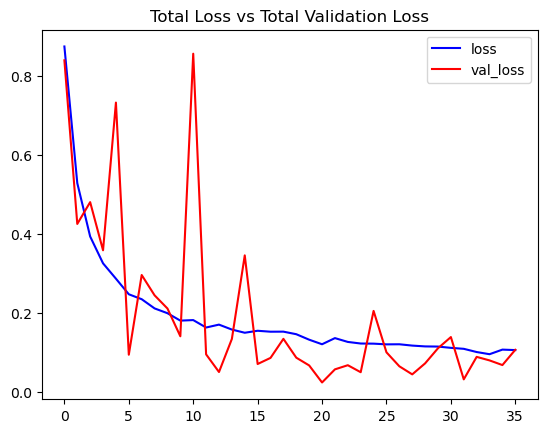

In [25]:
plot_metric('loss', 'val_loss', 'Total Loss vs Total Validation Loss')

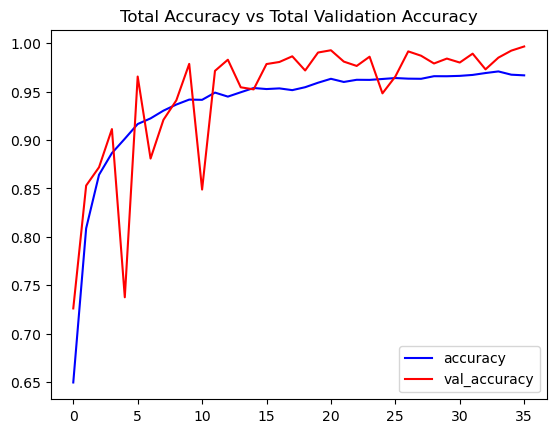

In [26]:
plot_metric('accuracy', 'val_accuracy', 'Total Accuracy vs Total Validation Accuracy')

In [27]:
def download_youtube_videos(youtube_video_url, output_directory):
    # Creating a Video object which includes useful information regarding the youtube video.
    video = pafy.new(youtube_video_url)
 
    # Getting the best available quality object for the youtube video.
    video_best = video.getbest()
 
    # Constructing the Output File Path
    output_file_path = f'{output_directory}/{video.title}.mp4'
 
    # Downloading the youtube video at the best available quality.
    video_best.download(filepath = output_file_path, quiet = True)
 
    # Returning Video Title
    return video.title

In [28]:
def predict_on_live_video(video_file_path, output_file_path, window_size):
 
    # Initialize a Deque Object with a fixed size which will be used to implement moving/rolling average functionality.
    predicted_labels_probabilities_deque = deque(maxlen = window_size)
 
    # Reading the Video File using the VideoCapture Object
    video_reader = cv2.VideoCapture(video_file_path)
 
    # Getting the width and height of the video 
    original_video_width = int(video_reader.get(cv2.CAP_PROP_FRAME_WIDTH))
    original_video_height = int(video_reader.get(cv2.CAP_PROP_FRAME_HEIGHT))
 
    # Writing the Overlayed Video Files Using the VideoWriter Object
    video_writer = cv2.VideoWriter(output_file_path, cv2.VideoWriter_fourcc('M', 'P', '4', 'V'), 24, (original_video_width, original_video_height))
 
    while True: 
 
        # Reading The Frame
        status, frame = video_reader.read() 
 
        if not status:
            break
 
        # Resize the Frame to fixed Dimensions
        resized_frame = cv2.resize(frame, (image_height, image_width))
         
        # Normalize the resized frame by dividing it with 255 so that each pixel value then lies between 0 and 1
        normalized_frame = resized_frame / 255
 
        # Passing the Image Normalized Frame to the model and receiving Predicted Probabilities.
        predicted_labels_probabilities = model.predict(np.expand_dims(normalized_frame, axis = 0))[0]
 
        # Appending predicted label probabilities to the deque object
        predicted_labels_probabilities_deque.append(predicted_labels_probabilities)
 
        # Assuring that the Deque is completely filled before starting the averaging process
        if len(predicted_labels_probabilities_deque) == window_size:
 
            # Converting Predicted Labels Probabilities Deque into Numpy array
            predicted_labels_probabilities_np = np.array(predicted_labels_probabilities_deque)
 
            # Calculating Average of Predicted Labels Probabilities Column Wise 
            predicted_labels_probabilities_averaged = predicted_labels_probabilities_np.mean(axis = 0)
 
            # Converting the predicted probabilities into labels by returning the index of the maximum value.
            predicted_label = np.argmax(predicted_labels_probabilities_averaged)
 
            # Accessing The Class Name using predicted label.
            predicted_class_name = classes_list[predicted_label]
           
            # Overlaying Class Name Text Ontop of the Frame
            cv2.putText(frame, predicted_class_name, (10, 30), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 255), 2)
 
        # Writing The Frame
        video_writer.write(frame)
 
 
        # cv2.imshow('Predicted Frames', frame)
 
        # key_pressed = cv2.waitKey(10)
 
        # if key_pressed == ord('q'):
        #     break
 
    # cv2.destroyAllWindows()
 
     
    # Closing the VideoCapture and VideoWriter objects and releasing all resources held by them. 
    video_reader.release()
    video_writer.release()